In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

Bad pipe message: %s [b' 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Sa']
Bad pipe message: %s [b'ri/537.36\r\nAccept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/', b'ng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nA']
Bad pipe message: %s [b'ept-Language: en-US,en;q=0.9\r\nPriority: u=0, i\r\nReferer: https://studio.firebase.google.com/\r\nSec-', b'-Ua: "Google Chrome";v="137", "Chromium";v="137", "Not/A)Brand";v=']
Bad pipe message: %s [b'4"\r\nSec-Ch-Ua-Arch: "x86"\r\nSec-Ch']
Bad pipe message: %s [b'a-Bitness: "64"\r\nSec-Ch-Ua-Form-Factors: "De', b'top"\r\nSec-Ch-Ua-Full-Version: "137.0.7151.104"\r\nSec-Ch-Ua-Full-Version-List: "Google Chrome";v="137.0.7151.104", "', b'romium";v="137.0.7151.104", "Not/A)Brand";v="24.0.0.0"\r\nSec-Ch-Ua-']
Bad pipe message: %s [b'bile: ?0\r\nSec-Ch-Ua-Model: ""\r\nSec-Ch-Ua-Platform: "Windows"\r\nSec-Ch-Ua-Plat', b'rm-Version: "19

In [2]:
df=pd.read_csv("updated_Algerian_forest_fires_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [5]:
#drop nmonth ,year, day
df.drop(columns=['day','month','year'],inplace=True,axis=1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
 df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
 df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [11]:
## independent and dependent feature
X=df.drop('FWI',axis=1)
Y=df["FWI"]
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
# train and etst split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [14]:
## feature selection based on correlation
X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

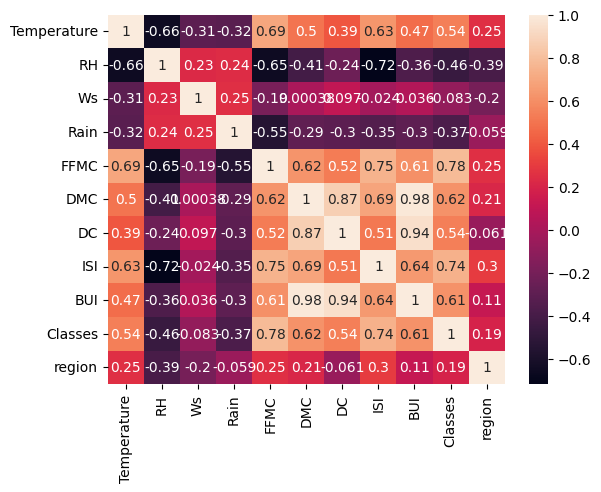

In [15]:

import seaborn as sns
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [16]:
corr_matrix1=X_train.corr()
len(corr_matrix1.columns)
corr_matrix1.iloc[2,3]

np.float64(0.25193172257821067)

In [17]:
def correlation(dataset, theresold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>theresold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr



In [18]:
corr_features=correlation(X_train,0.85)


In [19]:
corr_features

{'BUI', 'DC'}

In [20]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [21]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'After the sclaing ')

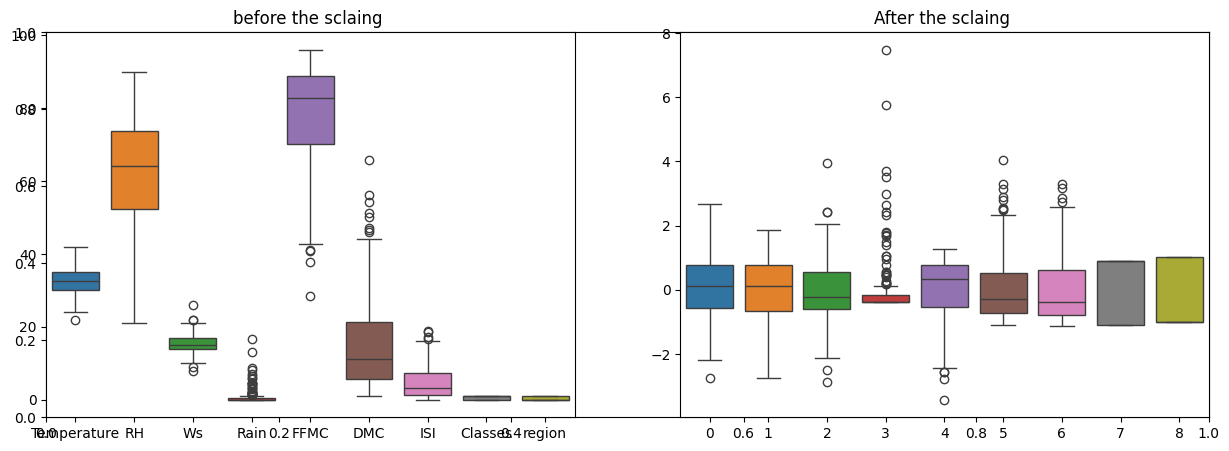

In [23]:
## effect of the scaling
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("before the sclaing ")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After the sclaing ")

mean absolute error  0.5468236465249986
my_score_r2 0.9839977157632893


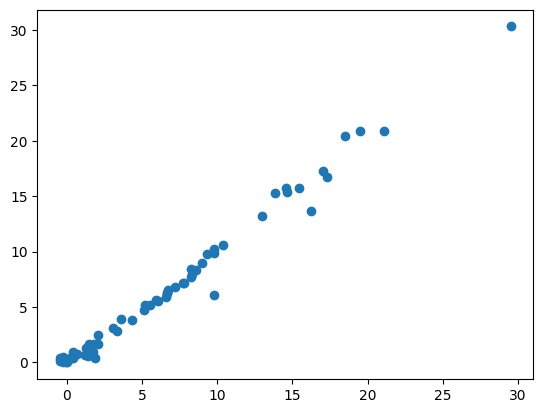

In [24]:
## linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_model=LinearRegression()
lin_model.fit(X_train_scaled,Y_train)
Y_pred=lin_model.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_pred,Y_test)

mean absolute error  1.133175994914409
my_score_r2 0.926474232680569


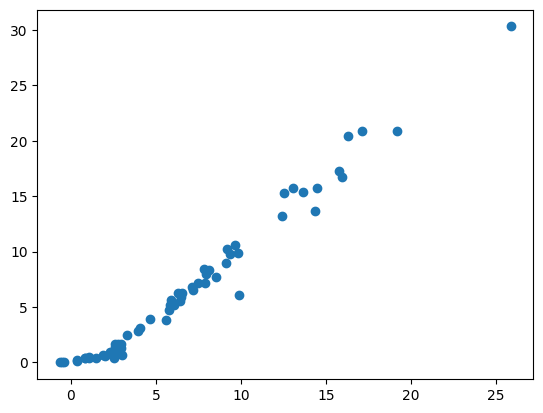

In [25]:
## lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso_model=Lasso()
lasso_model.fit(X_train_scaled,Y_train)
Y_pred=lasso_model.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_pred,Y_test)


mean absolute error  0.619970115826343
my_score_r2 0.980851982434192


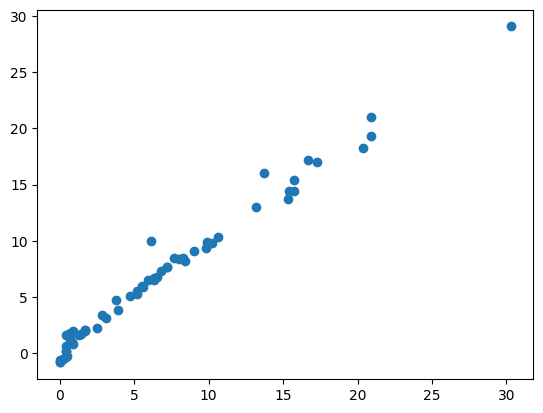

In [27]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,Y_train)
Y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_test,Y_pred)

mean absolute error  0.5642305340105692
my_score_r2 0.9834070933284212


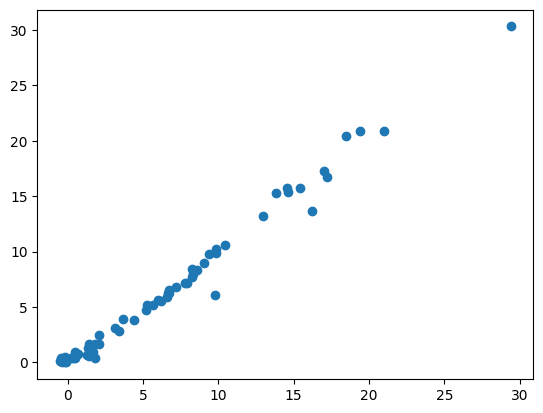

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge_model=Ridge()
ridge_model.fit(X_train_scaled,Y_train)
Y_pred=ridge_model.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_pred,Y_test)


mean absolute error  0.5642305340107913
my_score_r2 0.9834070933284251


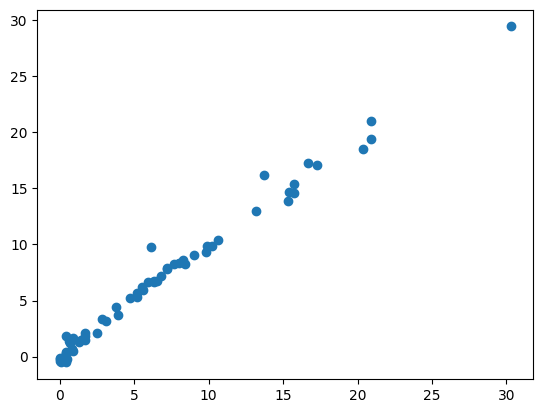

In [29]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(X_train_scaled,Y_train)
Y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_test,Y_pred)

mean absolute error  0.6575946731430898
my_score_r2 0.9799084998743879


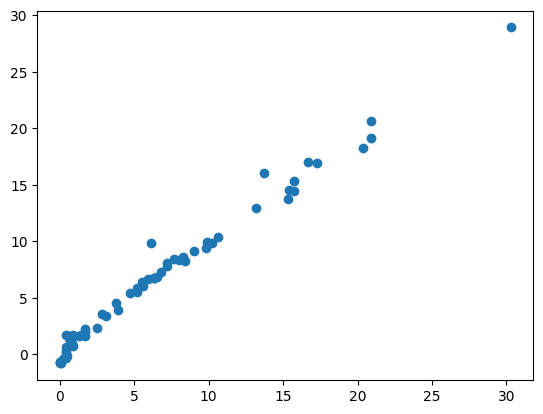

In [30]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,Y_train)
Y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_test,Y_pred)

mean absolute error  1.8822353634896005
my_score_r2 0.7814447243400926


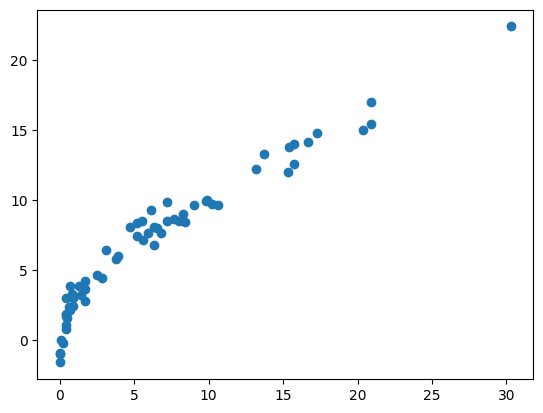

In [31]:
## elastic net regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic_model=ElasticNet()
elastic_model.fit(X_train_scaled,Y_train)
Y_pred=elastic_model.predict(X_test_scaled)
mae=mean_absolute_error(Y_pred,Y_test)
score=r2_score(Y_pred,Y_test)
print("mean absolute error ",mae)
print('my_score_r2',score)
plt.scatter(Y_test,Y_pred)


In [ ]:
### pickle the machine learning models . preprocessing models standarsscaler

In [32]:
scaler

StandardScaler()

In [34]:
ridge_model

Ridge()

In [37]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge_model,open('ridge_model.pkl','wb'))